In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
img = imread('me2.jpg')
plt.imshow(img)
img.shape

In [ ]:
img1 = img[:, :, 0]
img2 = img[:, :, 1]
img3 = img[:, :, 2]

In [ ]:
plt.imshow(img1, cmap='gray')

In [ ]:
plt.imshow(img2, cmap='gray')

In [ ]:
plt.imshow(img3, cmap='gray')

In [ ]:
print(img3.shape)

In [ ]:
from google.colab.patches import cv2_imshow
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
cv2_imshow(gray)

In [17]:
'''Digital Negative'''
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        gray[i][j] = 255 - gray[i][j]

cv2_imshow(gray)

NameError: name 'gray' is not defined

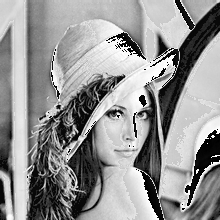

In [ ]:
'''Contrast Stretching'''
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
a = 50
b = 150
alpha = 0.2
beta = 2
gamma = 1
y_a = 30
y_b = 200
L = 255
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        if 0 <= gray[i][j] < a:
            gray[i][j] *= alpha
        elif a <= gray[i][j] < b:
            gray[i][j] = beta * (gray[i][j] - a) + y_a
        elif b <= gray[i][j] < L:
            gray[i][j] = gamma * (gray[i][j] - b) + y_b
cv2_imshow(gray)

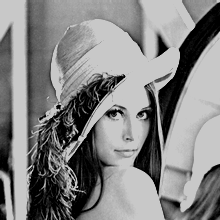

In [ ]:
'''Clipping'''
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        if 0 <= gray[i][j] < a:
            gray[i][j] = 0
        elif a <= gray[i][j] < b:
            gray[i][j] = beta * (gray[i][j] - a)
        elif b <= gray[i][j] < L:
            gray[i][j] = beta * (b - a)
cv2_imshow(gray)

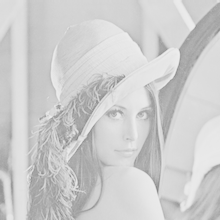

In [ ]:
'''Range Compression'''
import math
c = 100
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        gray[i][j] = 100 * math.log((1 + gray[i][j]), 10)

cv2_imshow(gray)

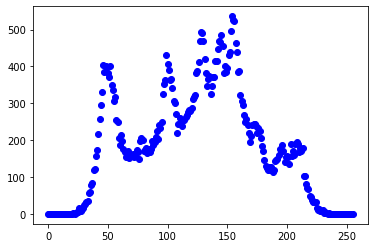

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = [0] * 256
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        hist[gray[i][j]] += 1

for x in range(len(hist)):
    plt.plot(x, hist[x], 'bo')
plt.show()

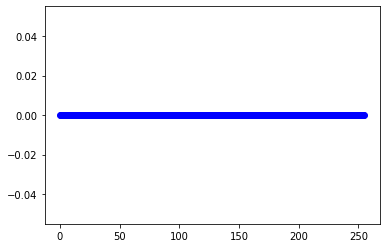

In [ ]:
'''histogram equalization'''
s = sum(hist)
for k in range(len(hist)):
    hist[k] = (sum(hist[:k]) / (s * 255))
for x in range(len(hist)):
    plt.plot(x, hist[x], 'bo')
plt.show()